<a href="https://colab.research.google.com/github/datawear-clothing/AI-generated-design/blob/main/Neural_Style_Transfer_Frida_Kahlo_Maurits_Cornelis_Escher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural style transfer

## [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ml4a/ml4a-guides/blob/ml4a.net/examples/models/neural_style.ipynb)

Synthesize textures with the style characteristics of an input image, or regenerate one image in the style of another.

The [neural_style module](https://github.com/genekogan/neural_style) is based on [ProGamerGov's PyTorch re-write](https://github.com/ProGamerGov/neural-style-pt) of Justin Johnson's [torch implementation](https://github.com/jcjohnson/neural-style/), which is itself based on the paper by [Gatys et al](https://arxiv.org/abs/1508.06576).


## Set up ml4a and enable GPU

If you don't already have ml4a installed, or you are opening this in Colab, first enable GPU (`Runtime` > `Change runtime type`), then run the following cell to install ml4a and its dependencies.

In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

## Run a basic neural style transfer

We import `neural_style` and then create a config which at minimum specifies an input image, output image, image size, and the number of iterations to optimize for.

Note that the GPU memory requirements scale linearly with the number of pixels, and that `neural_style` will crash if you attempt to set the `size` parameter higher than your GPU allows for. 11GB VRAM allows for around 10⁶ pixels. Try increasing your resolution until you run out of memory--this will help you figure out your limits.

Note, remember that doubling the resolution quadruples the number of pixels. You will run out memory very quickly!

content, style, output


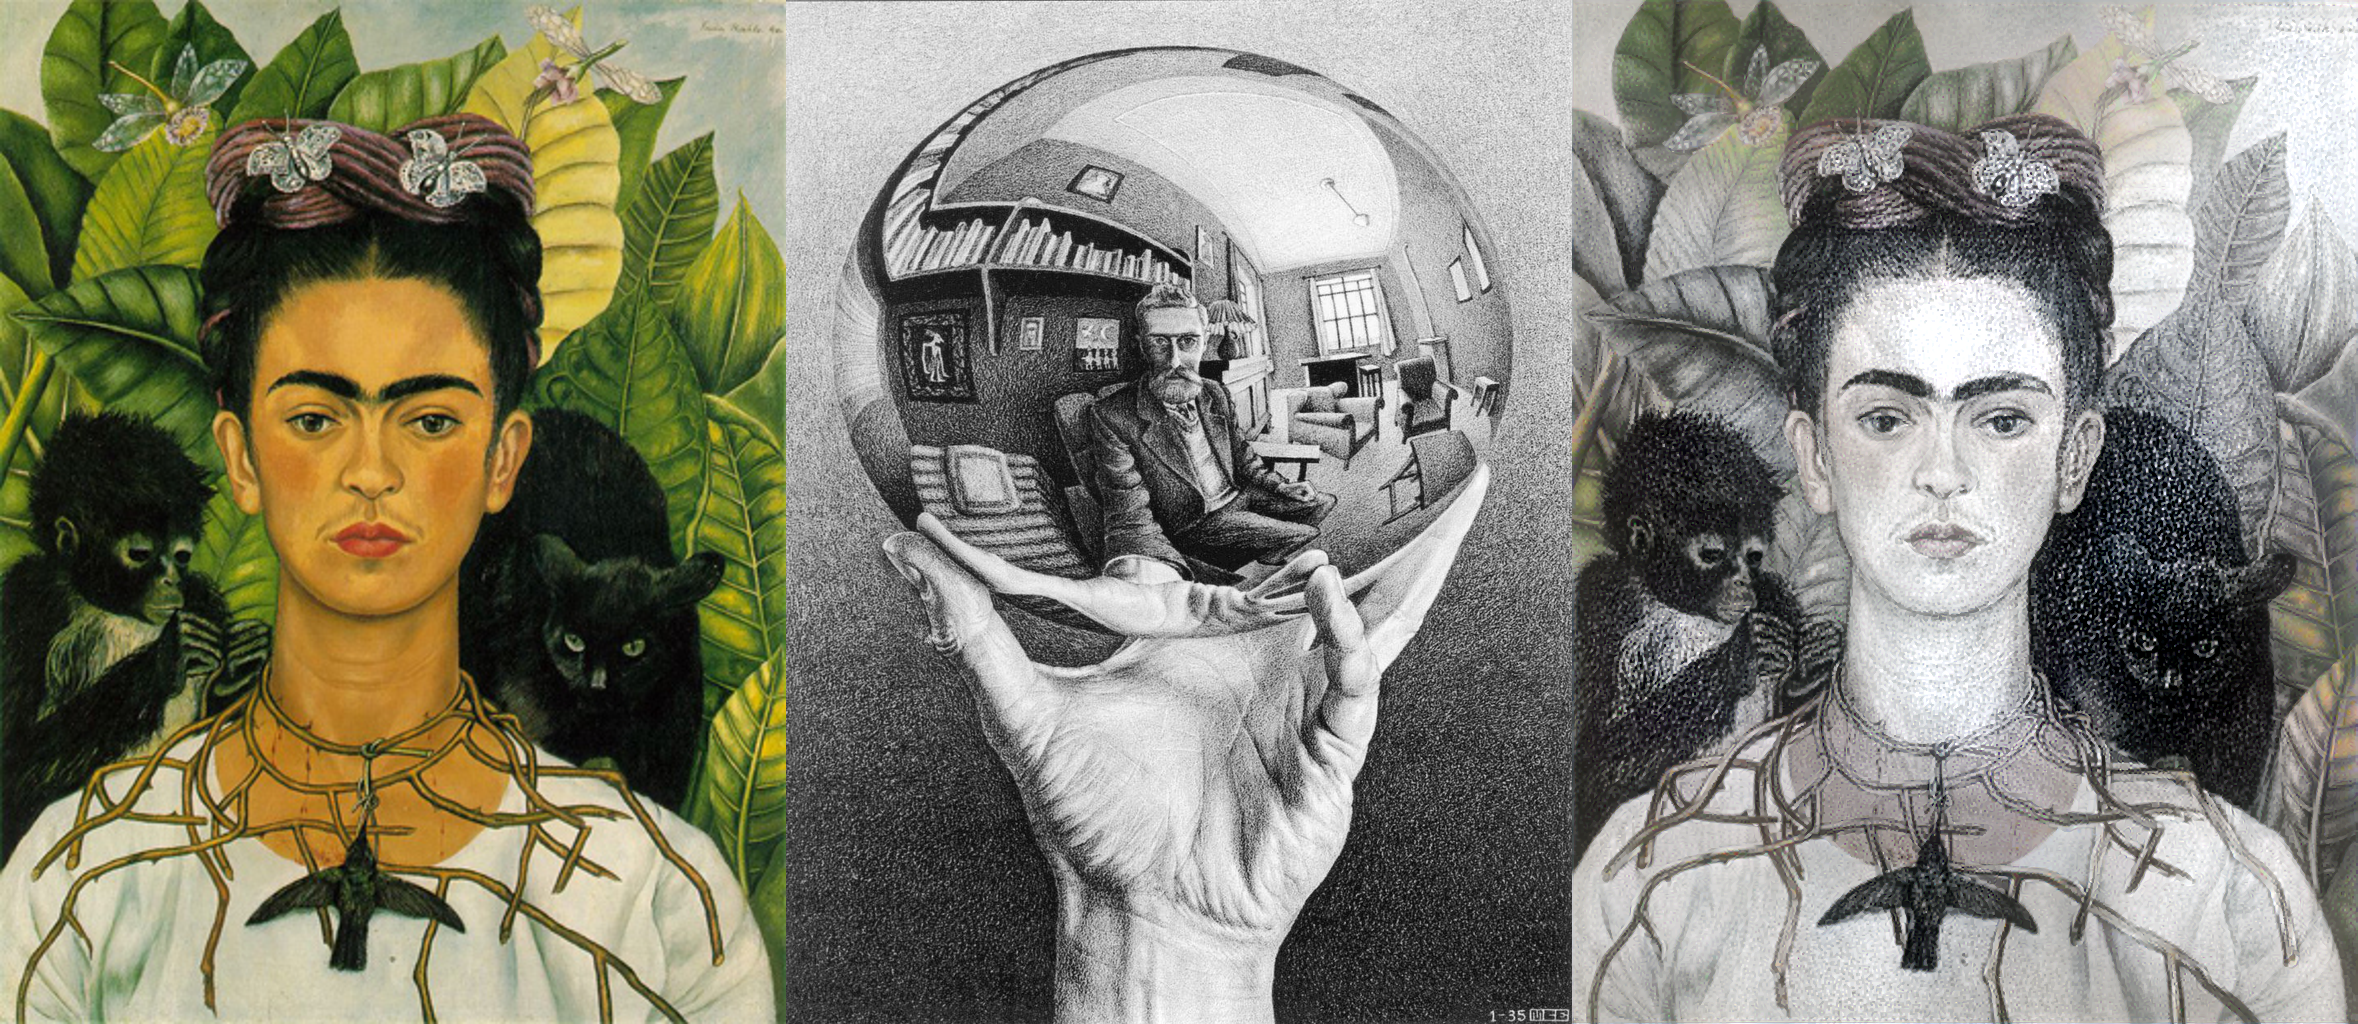

In [ ]:
from ml4a import image
from ml4a.models import neural_style

neural_style.params.gpu = '0'
neural_style.params.backend = 'cudnn'

config = {
    'size': 1024,
    'content_image': image.fridakahlo(),
    'style_images': image.escher(),
    'num_iterations': [1000, 750, 500],
    'num_octaves': 3,
    'octave_ratio': 2.0
}

output_image = neural_style.run(config)

output_size = image.get_size(output_image)

image.display([image.fridakahlo(output_size), 
               image.escher(output_size), 
               output_image], 
              title="content, style, output")